## Classification using vertebrate data set

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
data = pd.read_csv('data/vertebrate/data.csv')

In [3]:
data.head()

,Name,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class Label
0,human,warm-blooded,hair,yes,no,no,yes,no,mammal
1,python,cold-blooded,scales,no,no,no,no,yes,reptile
2,salmon,cold-blooded,scales,no,yes,no,no,no,fish
3,whale,warm-blooded,hair,yes,yes,no,no,no,mammal
4,frog,cold-blooded,none,no,semi,no,yes,yes,amphibian


In [4]:
# List of all classes
data['Class Label']

0        mammal
1       reptile
2          fish
3        mammal
4     amphibian
5       reptile
6        mammal
7          bird
8        mammal
9          fish
10      reptile
11         bird
12       mammal
13         fish
14    amphibian
Name: Class Label, dtype: object

In [5]:
# List of unique classes
data['Class Label'].unique()

array(['mammal', 'reptile', 'fish', 'amphibian', 'bird'], dtype=object)

In [6]:
# Number of entries for each unique classes
data.groupby('Class Label').apply(lambda x: len(x))

Class Label
amphibian      2
bird           2
fish           3
mammal         5
reptile        3
dtype: int64

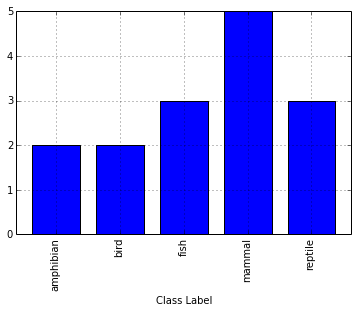

In [7]:
# Plot bar chart based on Class Label
data.groupby('Class Label').apply(lambda x: len(x)).plot(kind='bar')